In [1]:
from google.colab import files
import pandas as pd
import io

In [ ]:
uploaded_file = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


In [ ]:
!curl -L -o /content/sample_data/salary-dataset-simple-linear-regression.zip\
  https://www.kaggle.com/api/v1/datasets/download/abhishek14398/salary-dataset-simple-linear-regression

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   457  100   457    0     0   1018      0 --:--:-- --:--:-- --:--:--  1018


In [ ]:
!unzip /content/sample_data/salary-dataset-simple-linear-regression.zip

Archive:  /content/sample_data/salary-dataset-simple-linear-regression.zip
replace Salary_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Salary_dataset.csv      


# Task
Criar um Jupyter Notebook no Colab para importar o dataset "https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression", realizar análise exploratória, preparar os dados, construir e treinar um modelo de Regressão Linear para prever salário com base nos anos de experiência, avaliar o modelo, fazer previsões e visualizar os resultados.

## Carregar os dados

### Subtask:
Carregar o dataset Salary_dataset.csv em um DataFrame pandas.


**Reasoning**:
Load the Salary_dataset.csv file into a pandas DataFrame and display the first few rows to verify the data loading.



In [4]:
df = pd.read_csv('Salary_dataset.csv')
display(df.head())

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df = pd.read_csv('/content/Salary_dataset.csv')
display(df.head())

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## Análise exploratória de dados (eda)

### Subtask:
Explorar os dados para entender a relação entre anos de experiência e salário, verificar valores ausentes e visualizar a distribuição dos dados.


In [5]:
display(df.head())

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


None

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [7]:
display(df.isnull().sum())

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


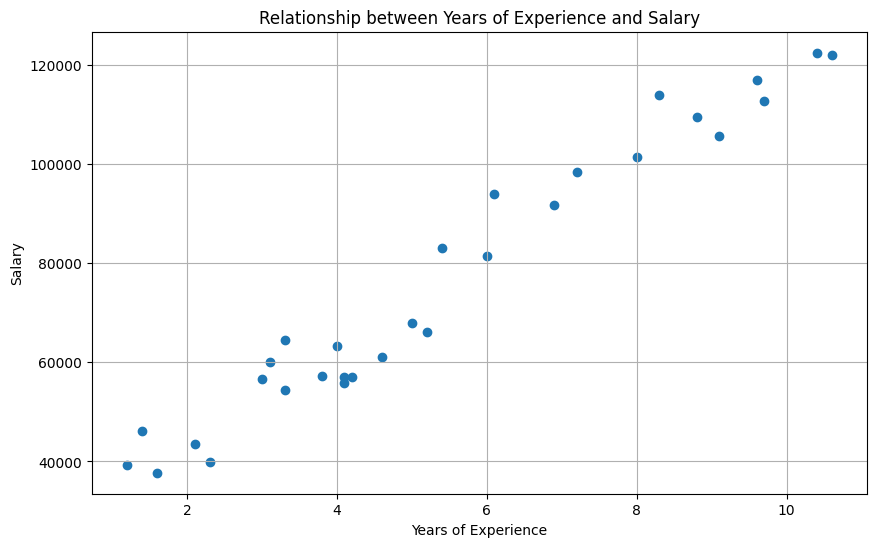

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['Salary'])
plt.title('Relationship between Years of Experience and Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

## Preparar os dados

### Subtask:
Separar os dados em features (anos de experiência) e target (salário) e dividir o dataset em conjuntos de treino e teste.


In [9]:
X = df[['YearsExperience']]
y = df['Salary']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24, 1)
X_test shape: (6, 1)
y_train shape: (24,)
y_test shape: (6,)


## Criar e treinar o modelo

### Subtask:
Construir um modelo de Regressão Linear usando uma biblioteca como scikit-learn e treiná-lo com os dados de treino.


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Avaliar o modelo

### Subtask:
Avaliar a performance do modelo nos dados de teste usando métricas como R² e Erro Quadrático Médio (RMSE).


In [11]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared: 0.9024461774180497
Mean Squared Error (MSE): 49830096.855908394
Root Mean Squared Error (RMSE): 7059.04362190151


## Fazer previsões

### Subtask:
Usar o modelo treinado para fazer previsões de salário para novos anos de experiência.


**Reasoning**:
Use the trained linear regression model to predict salaries on the test data and store the predictions.



In [12]:
y_pred = model.predict(X_test)

## Visualizar os resultados

### Subtask:
Visualizar a linha de regressão em relação aos dados para entender o ajuste do modelo.


**Reasoning**:
Visualize the training data and the linear regression line to understand the model's fit.



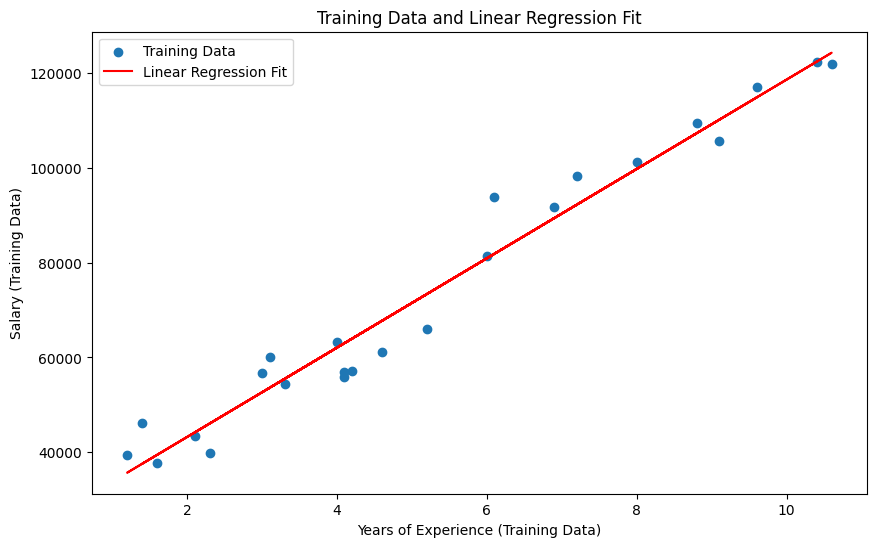

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Linear Regression Fit')
plt.xlabel('Years of Experience (Training Data)')
plt.ylabel('Salary (Training Data)')
plt.title('Training Data and Linear Regression Fit')
plt.legend()
plt.show()

Descobertas da Análise de Dados
O conjunto de dados contém 30 entradas com 'AnosDeExperiência' (YearsExperience) e 'Salário' (Salary) como principais colunas numéricas, e não apresenta valores ausentes.

Foi observada uma forte relação linear positiva entre 'AnosDeExperiência' e 'Salário' durante a análise exploratória de dados.

O conjunto de dados foi dividido com sucesso em conjuntos de treinamento (24 amostras) e teste (6 amostras).

Um modelo de Regressão Linear foi treinado com os dados de treinamento.

O modelo alcançou um R-quadrado (R-squared) de aproximadamente 0.9024 nos dados de teste, indicando que cerca de 90% da variação no salário é explicada pelo modelo.

O Erro Quadrático Médio (EQM - Mean Squared Error, MSE) nos dados de teste foi de aproximadamente 49.830.096,86.

A Raiz do Erro Quadrático Médio (REQM - Root Mean Squared Error, RMSE) nos dados de teste foi de aproximadamente 7.059,04, representando o desvio médio das previsões em relação aos salários reais.

A visualização mostrou um claro ajuste linear do modelo aos dados de treinamento.